# Detección de Outliers

Los datos que usaremos en este notebook, "Outliers_Data_1.csv" y "Outliers_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "Outliers_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "Outliers_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [21]:
data = pd.read_csv('../DataSets/Outliers_Data_1.csv')
data.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


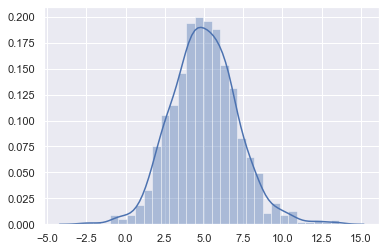

In [22]:
sns.distplot(data)

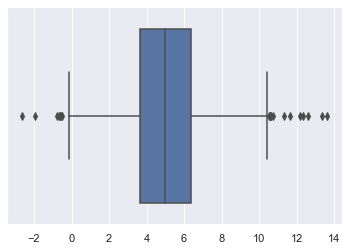

In [23]:
sns.boxplot(data)

### 2. Reescaleo de datos

In [24]:
print("Filas: ", data.Datos.count())
print("Minimo: ", data.Datos.min())
print("Maximo: ", data.Datos.max())
print("Promedio: ", data.Datos.mean())
print("Mediana: ", data.Datos.median())
print("Desvio standard: ", data.Datos.std())
print("Corr: ", data.Datos.corr)

Filas:  1000
Minimo:  -2.6197807557031263
Maximo:  13.613645129212232
Promedio:  5.025682949133377
Mediana:  4.990536947069277
Desvio standard:  2.1061283981914283
Corr:  <bound method Series.corr of 0      2.370556
1      3.437876
2      6.300131
3      5.403170
4      5.722120
         ...   
995    4.613314
996    4.188867
997    3.394737
998    6.384074
999    4.145870
Name: Datos, Length: 1000, dtype: float64>


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
print(scaler.mean_)

[5.02568295]


In [26]:
data['Datos_Reescalados']=scaler.transform(data)
data.head()

,Datos,Datos_Reescalados
0,2.370556,-1.261298
1,3.437876,-0.754276
2,6.300131,0.605417
3,5.403170,0.179322
4,5.722120,0.330837


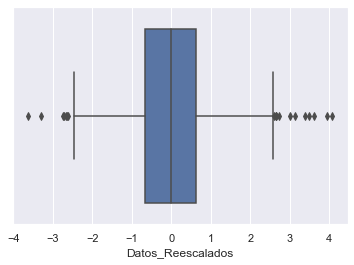

In [27]:
sns.boxplot(data['Datos_Reescalados'])

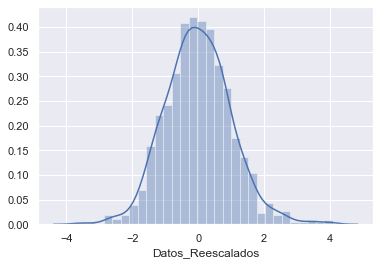

In [28]:
sns.distplot(data['Datos_Reescalados'])

In [29]:
valor_medio = data.Datos.median()
std = data.Datos.std()
data['Datos_Reescalados_Manual'] = (data['Datos'] - valor_medio) / std
data.head()

,Datos,Datos_Reescalados,Datos_Reescalados_Manual
0,2.370556,-1.261298,-1.243980
1,3.437876,-0.754276,-0.737211
2,6.300131,0.605417,0.621802
3,5.403170,0.179322,0.195920
4,5.722120,0.330837,0.347359


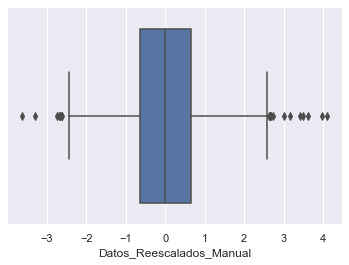

In [30]:
sns.boxplot(data['Datos_Reescalados_Manual'])

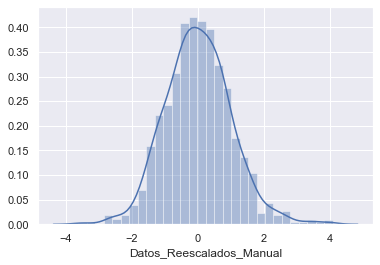

In [31]:
sns.distplot(data['Datos_Reescalados_Manual'])

### 3. Manejo de outliers

1. Rango intercuartílico.

In [32]:
q25 = data.Datos.quantile(0.25)
q75 = data.Datos.quantile(0.75)
iqr = q75 - q25
valor_medio = data.Datos.median()
std = data.Datos.std()
minimo = valor_medio - 3 * std
maximo = valor_medio + 3 * std
print(q25,q75,iqr)
print(minimo, maximo)
print(std, valor_medio)

3.6279769872275214 6.360215379673109 2.7322383924455877
-1.327848247505008 11.308922141643562
2.1061283981914283 4.990536947069277


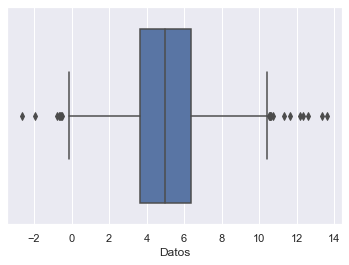

In [34]:
sns.boxplot(data['Datos'])

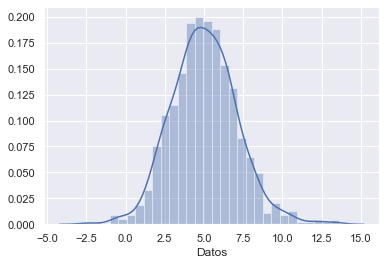

In [33]:
sns.distplot(data['Datos'])

In [35]:
mascara_outliers = np.logical_or(data['Datos'] < (q25 - iqr * 1.5), data['Datos'] > (q75 + iqr * 1.5))
mascara_outliers.sum()

19

In [38]:
q25 = data.Datos_Reescalados.quantile(0.25)
q75 = data.Datos_Reescalados.quantile(0.75)
iqr = q75 - q25
mascara_outliers_reescalados2 = np.logical_or(data['Datos_Reescalados'] < (q25 - iqr * 1.5), data['Datos_Reescalados'] > (q75 + iqr * 1.5))
mascara_outliers_reescalados2.sum()

19

2. Regla de las tres sigmas

In [36]:
mascara_outliers = np.logical_or(data['Datos'] < minimo, data['Datos'] > maximo)
mascara_outliers.sum()

9

In [37]:
valor_medio = data.Datos_Reescalados.median()
std = data.Datos_Reescalados.std()
minimo = valor_medio - 3 * std
maximo = valor_medio + 3 * std
mascara_outliers_reescalados = np.logical_or(data['Datos_Reescalados'] < minimo, data['Datos_Reescalados'] > maximo)
mascara_outliers_reescalados.sum()

9

In [17]:
#Filtrar los outlayers
data2 = data[data['Datos'] > minimo]
data2 = data2[data2['Datos'] < maximo]

In [20]:
data2.count()

Datos                       991
Datos_Reescalados           991
Datos_Reescalados_Manual    991
dtype: int64

In [18]:
q25 = data.Datos.quantile(0.25)
q75 = data.Datos.quantile(0.75)
iqr = q75 - q25
valor_medio = data.Datos.median()
std = data.Datos.std()

data3 = data[data['Datos'] > q25]
data3 = data3[data3['Datos'] < q75]
data3.count()

Datos                       500
Datos_Reescalados           500
Datos_Reescalados_Manual    500
dtype: int64